# The results for the propeller case

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from lifting_line_singular import lifting_line_model_singular
from lifting_line_general import lifting_line_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Singular rotor with airfoil polars

In [119]:
#turbine parameters
R = 0.7 
N_blades = 6
mu_start = 0.25
mu_end = 1
U_0 = 60

N_blade_sec = 20       #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = int(5)              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.25             #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
#TSR = 10              # TSR for turbine case        
n = 1200               # RPM
Omega = n*2*np.pi/60
TSR = Omega*R/U_0 # tip speed ratio

airfoil = 'ARA_polar.txt' #DU_polar.txt or ARA_polar.txt


In [120]:
chord = [0.05139898, 0.11895332, 0.16872725, 0.20837842, 0.24114258, 0.26883677, 
                      0.29261428, 0.31326258, 0.33134608, 0.34728329, 0.36139513, 0.37393222, 
                      0.38509571, 0.39504802, 0.40392343, 0.41183346, 0.41887377, 0.42512437, 
                      0.43065565, 0.43552729, 0.43979251, 0.44349813, 0.44668441, 0.44938816, 
                      0.45164176, 0.45347444, 0.45491122, 0.45597546, 0.45668763, 0.45706593, 
                      0.45712645, 0.45688331, 0.45634882, 0.45553351, 0.45444664, 0.45309467, 
                      0.45148364, 0.44961762, 0.44749908, 0.44512896, 0.44250651, 0.43962938,
                      0.43649346, 0.43309288, 0.42941988, 0.42546472, 0.42121565, 0.41665846, 
                      0.41177689, 0.40655196, 0.40096201, 0.39498248, 0.38858569, 0.381741, 
                      0.37441294, 0.36656333, 0.3581494, 0.34912418, 0.33943453, 0.32907887, 
                      0.31788585, 0.3058371, 0.29285442, 0.27885182, 0.2637341, 0.24739567, 
                      0.22971939, 0.21057327, 0.18981114, 0.16721916, 0.1427112, 0.11600965, 
                      0.08684387, 0.0548571, 0.0194645]
twist = [19.56213459, 21.0027812 , 22.04052124, 22.85770294, 23.5164957 ,
                   24.05118268, 24.48458539, 24.83337657, 25.11039231, 25.32584627,
                   25.48805246, 25.60389383, 25.6791444 , 25.71870031, 25.72675078,
                   25.70690762, 25.6623053 , 25.5956795 , 25.50942963, 25.40566908,
                   25.28626621, 25.15287787, 25.00697724, 24.84987705, 24.68274901,
                   24.50664033, 24.32248769, 24.13112918, 23.93331459, 23.72971425,
                   23.52092665, 23.30748506, 23.0898633 , 22.86848075, 22.64370665,
                   22.41586394, 22.18523251, 21.95205203, 21.71652441, 21.47881584,
                   21.23905858, 20.99735235, 20.75376554, 20.50833605, 20.26107194,
                   20.01195182, 19.76092493, 19.50791109, 19.25280023, 18.99545183,
                   18.73569396, 18.47332206, 18.20809743, 17.93974535, 17.66795276,
                   17.39236562, 17.11258563, 16.82816645, 16.53860916, 16.24533028,
                   15.94384477, 15.63532988, 15.31900234, 14.9939818 , 14.65927256,
                   14.31373729, 13.95605695, 13.58466588, 13.19763999, 12.79122612,
                   12.36479614, 11.91145333, 11.42167243, 10.87433262, 10.19454997]

In [124]:
mu_vec = np.array([mu_start, mu_end])   #vector where chord and twist are known. NOTE beginpoint needs to be mu_start and end point mu_end
if airfoil=='ARA_polar.txt':
    mu_vec = np.linspace(mu_start, mu_end, len(chord))

chord_vec = np.array(chord)  #chord values at above locations in m
twist_vec = np.array(twist) #twist values at above locations in degrees

spacing = 'cosine'  #spacing method to use, choose from 'cosine' or 'uniform'

#intialize the class
L = lifting_line_model_singular(R, N_blades, mu_start, mu_end, mu_vec, chord_vec, twist_vec, U_0, TSR, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L.weight_step = 0.05
#L.print_progress = False
#commit all the inputs
L.commit_parameters()


Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Constructing blade number 3
Constructing blade number 4
Constructing blade number 5
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0
Evaluating the effect of the vorticity from blade 2 on blade 0
Evaluating the effect of the vorticity from blade 3 on blade 0
Evaluating the effect of the vorticity from blade 4 on blade 0
Evaluating the effect of the vorticity from blade 5 on blade 0


Solving problem using lift and drag polar data
Converged within iteration limit!
CT = 0.609382552545341
CP = 0.41675294955855763
[44.94387419 42.80083578 39.40444346 35.40008771 31.23381008 27.23245189
 23.58955201 20.4077209  17.78580374 15.84218309 14.67358502 14.43670562
 14.76504783 15.45111671 16.35217222 17.36281905 18.40713205 19.37119105
 20.17308751 20.70776655]


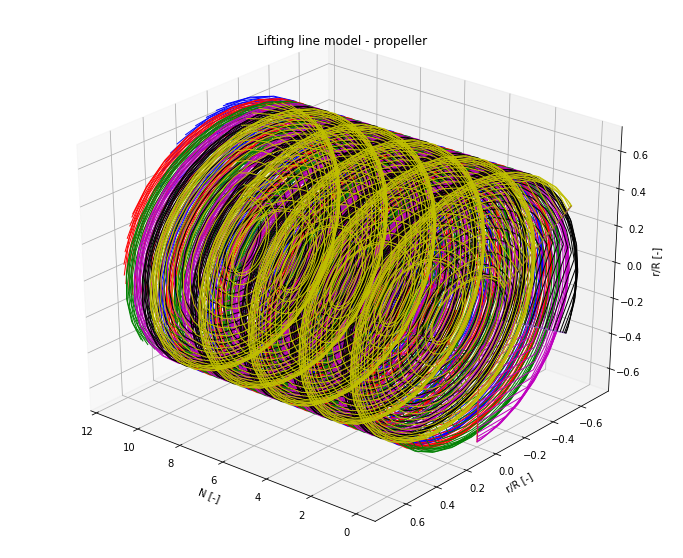

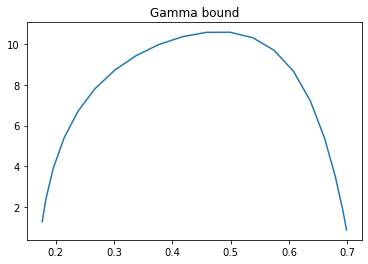

In [125]:
single_line_plot = False
#plot the wake of the rotor
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

colors = ['b','r','g', 'm', 'k', 'y']

for j in range(N_blades):
    ax.plot(L.blades[j].x_cp,L.blades[j].y_cp,L.blades[j].z_cp)
    for i in range(N_blade_sec+1):

        ax.plot(L.blades[j].x_wake[i,:],L.blades[j].y_wake[i,:],L.blades[j].z_wake[i,:], 
                colors[j], linewidth=1)
L.solve_system()

print(L.blades[0].alpha)
ax.view_init(30, -50-180)
ax.set_ylabel('r/R [-]')
ax.set_zlabel('r/R [-]')
ax.set_xlabel('N [-]')
ax.set_title('Lifting line model - propeller')
fig.savefig("prop_img/prop_lifting_line_3d.png")

fig2 = plt.figure()
plt.plot(L.blades[0].R_cent,L.blades[0].gamma_bound)
plt.xlabel('')
plt.ylabel('')
plt.title('Gamma bound')
plt.savefig('prop_img/prop_gamma_bound.png')

In [132]:
L.blades[0].__dict__

{'R': 0.7,
 'R_dist': array([0.175     , 0.17823181, 0.18784766, 0.20361079, 0.22513304,
        0.25188447, 0.28320637, 0.31832749, 0.35638304, 0.39643595,
        0.4375    , 0.47856405, 0.51861696, 0.55667251, 0.59179363,
        0.62311553, 0.64986696, 0.67138921, 0.68715234, 0.69676819,
        0.7       ]),
 'R_cent': array([0.17661591, 0.18303974, 0.19572923, 0.21437191, 0.23850875,
        0.26754542, 0.30076693, 0.33735527, 0.3764095 , 0.41696798,
        0.45803202, 0.4985905 , 0.53764473, 0.57423307, 0.60745458,
        0.63649125, 0.66062809, 0.67927077, 0.69196026, 0.69838409]),
 'xi': 0.0,
 'location': 0,
 'mu_vec': array([0.25      , 0.26013514, 0.27027027, 0.28040541, 0.29054054,
        0.30067568, 0.31081081, 0.32094595, 0.33108108, 0.34121622,
        0.35135135, 0.36148649, 0.37162162, 0.38175676, 0.39189189,
        0.40202703, 0.41216216, 0.4222973 , 0.43243243, 0.44256757,
        0.4527027 , 0.46283784, 0.47297297, 0.48310811, 0.49324324,
        0.50337838, 0.5

# Singular rotor with impermeability boundary conditions

In [126]:
L.print_progress= False
L.solve_system_imper()

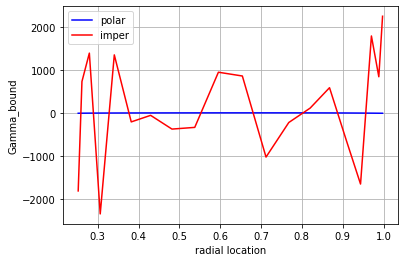

In [127]:
plt.figure()
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound, 'b', label ='polar')
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound_imper, 'r', label ='imper')
plt.grid(True)
plt.xlabel('radial location')
plt.ylabel('Gamma_bound')
plt.legend()

In [106]:
L.TSR = 6
L.commit_parameters()
L.solve_system()
L.solve_system_imper()

Converged within iteration limit!
CT = -2.594969631882272
CP = -4.7720977520937735


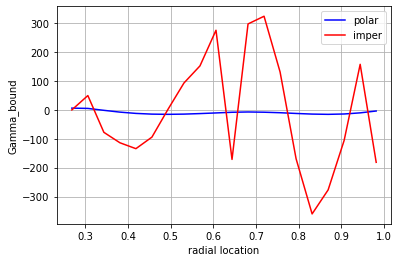

In [107]:
plt.figure()
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound,'b', label ='polar')
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound_imper,'r', label = 'imper')
plt.grid(True)
plt.xlabel('radial location')
plt.ylabel('Gamma_bound')
plt.legend()

# Two rotors

In [7]:
#turbine parameters
R = 50
N_blades = 3
mu_start = 0.2
mu_end = 1
U_0 = 10

N_blade_sec = 20       #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = 5              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.25             #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
TSR = 10          

airfoil = 'DU_polar.txt' #DU_polar.txt or ARA_polar.txt

mu_vec = np.array([0.2,1.0])   #vector where chord and twist are known. NOTE beginpoint needs to be mu_start and end point mu_end
chord_vec = np.array([3.4,1])  #chord values at above locations in m
twist_vec = np.array([9.2,-2]) #twist values at above locations in degrees

spacing = 'cosine'  #spacing method to use, choose from 'cosine' or 'uniform'

#######new part
N_rotors = 2 #max is 2 currently
phase_diff = 0 #phase difference in radians, note max phase_diff = 2*pi/N_blades
location = [0,2*R]  #y-locations of the rotors

#intialize the class for two rotor case
L1 = lifting_line_model(R, N_blades, mu_start, mu_end, mu_vec, chord_vec, twist_vec, U_0, TSR, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing, N_rotors = N_rotors, phase_diff = phase_diff, location=location)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L1.weight_step = 0.05
L1.print_progress = False
#commit all the inputs
L1.commit_parameters()


L1.solve_system()

print(L1.blades[0].alpha)
print(L1.blades[1].alpha)
print(L1.blades[2].alpha)

#solve the single rotor case again for TSR=10 to compare
L.TSR = 10
L.print_progress = False
L.commit_parameters()
L.solve_system()


Converged within iteration limit!
CT = 0.7995277932825463
CP = 0.5058770503925304
[5.54370239 6.0140414  6.89878361 6.75881326 6.05705072 5.22863353
 4.52086614 4.01659014 3.72570372 3.62121345 3.67539044 3.85669391
 4.13232986 4.47299379 4.8300058  5.14713849 5.31338283 5.0971275
 4.2098539  3.0284196 ]
[5.32743959 5.79164848 6.66926576 6.54889804 5.87894828 5.08707504
 4.41173596 3.93595568 3.66605269 3.5781815  3.64529635 3.836573
 4.11952556 4.46575982 4.82636584 5.14550652 5.31255462 5.09638546
 4.20900713 3.02779491]
[5.3483942  5.81281254 6.69075558 6.56713312 5.89131276 5.09200285
 4.40909906 3.92654365 3.65065814 3.55771494 3.62063454 3.8085706
 4.08891513 4.43328364 4.79357401 5.11364056 5.28284023 5.07003905
 4.18730399 3.01205546]
Converged within iteration limit!
CT = 0.7895031322380199
CP = 0.49379087670577193


For the single rotor case CT = 0.7895031322380199 and the two rotor case CT = 0.7995277932825463
For the single rotor case CP = 0.49379087670577193 and the two rotor case CP = 0.5058770503925304


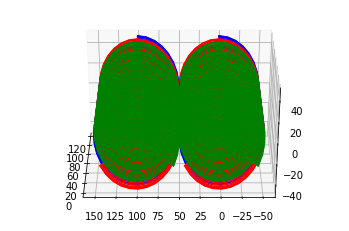

In [8]:
#plot the wake of the two rotor case
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 180)

colors = ['b','r','g']

#plot the wake structure
for k in range(2):
    for j in range(N_blades):
        ax.plot(L1.blades[N_blades*k+j].x_cp,L1.blades[N_blades*k+j].y_cp,L1.blades[N_blades*k+j].z_cp)
        for i in range(N_blade_sec+1):
            ax.plot(L1.blades[N_blades*k+j].x_wake[i,:],L1.blades[N_blades*k+j].y_wake[i,:],L1.blades[N_blades*k+j].z_wake[i,:], colors[j])

#compare the results of the two rotor case with the one rotor case
print('For the single rotor case CT = {} and the two rotor case CT = {}'.format(L.CT_polar,L1.CT_polar))
print('For the single rotor case CP = {} and the two rotor case CP = {}'.format(L.CP_polar,L1.CP_polar))
